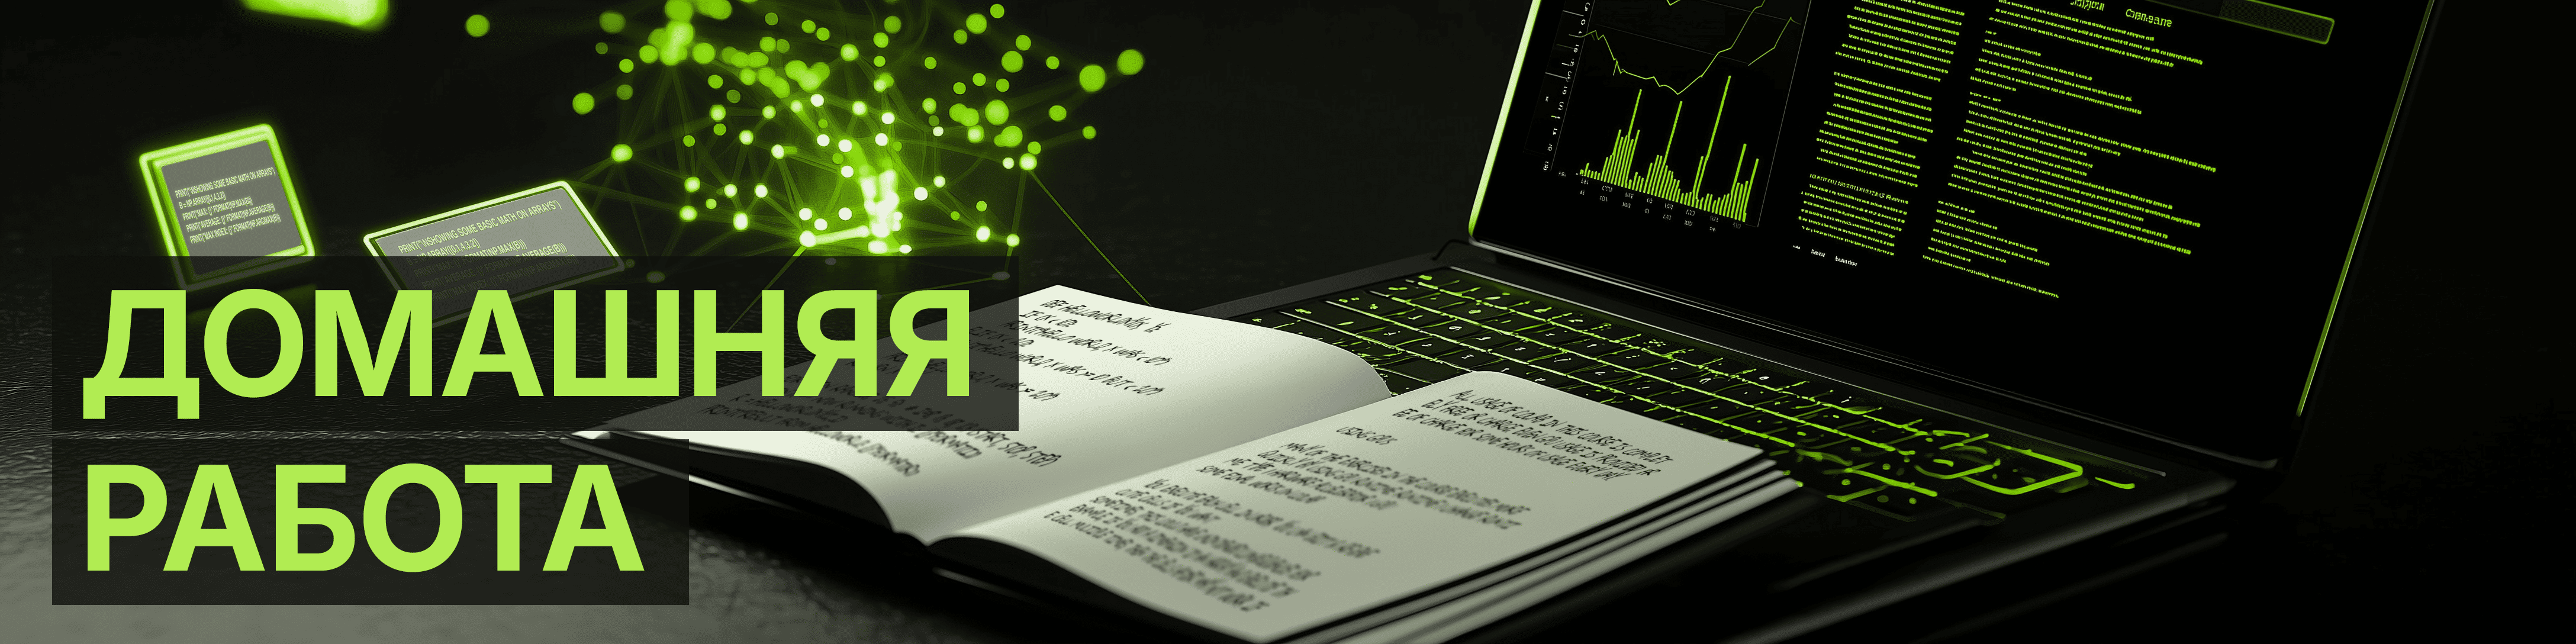

**Навигация по уроку**

1. [Рекуррентные нейронные сети](https://colab.research.google.com/drive/1Mm5yFeJXZT9YcwlQMGx_T5JcEVgV8ZWy)
2. [Одномерные сверточные нейронные сети](https://colab.research.google.com/drive/1SCmcJdfsaxpJiQz_SOMH6gixV-43zPIB)
3. [Сравнение архитектур рекуррентных и одномерных сверточных сетей](https://colab.research.google.com/drive/15-SEqMwU3ALZmiEtlJFZllc38VTGHkGu)
4. Домашняя работа

Когда вы еще учились в школе, то вас часто мучали написанием сочинений. Может быть даже кто-нибудь из вас увлекался написанием стихотворений, романов или прозы. А значит, в вас живет дух великого русского писателя. А вот интересно какого? В данной домашней работе мы это и выясним!

Чтобы узнать на какого писателя вы похожи необходимо выполнить следующее задание:

1. Скачать датасет с [писателями Русской литературы](https://storage.yandexcloud.net/academy.ai/russian_literature.zip). Каждый текст необходимо разбить на обучающую, проверочную и тестовую выборки, для этого модифицируйте функцию `seq_vectorize`, чтобы она возвращала все 3 выборки.
2. Используя материалы из ноутбука практического занятия [сравнение архитектур рекуррентных и одномерных сверточных сетей](https://colab.research.google.com/drive/15-SEqMwU3ALZmiEtlJFZllc38VTGHkGu), выберите лучший вариант нейронки и адаптируйте ее структуру.
3. Подгрузите веса Наташи как в уроке [20.3](https://colab.research.google.com/drive/1g_dX1XpRY--X6EjFflCC0717p9_9Y1SP) для слоя эмбендинга.
4. Заморозьте слой эмбединга.
5. Обучите модель на любом числе писателей (не менее 4-х) с балансировкой. Используйте обучающую выборку для обучения, а проверочную - в качестве валидационных данных (`validation_data`).
6. Постройте матрицу ошибок на тестовых образцах! В примерах мы строили на проверочных. Добейтесь средней точности более 70% на тестовых образцах. Получите 3 балла.
7. Если сможете добиться точности более 90% получите +1 балл.
8. Подготовьте свой текст и предложите нейронке предсказать на кого из русских писателей похож ваш текст. Вам необходимо построить круговую диаграмму с вероятностями предсказания моделью автора сочинения (по тестовой выборке). Если текст будет вашего авторства, то вы получите +1 балл. Если у вас плохо с фантазией, то возьмите небольшой фрагмент вашего любимого произведения любого автора, не представленного в датасете.

# Загрузка и обработка данных

In [ ]:
import os   # Модуль для работы с файловой системой

import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import keras
data_path = keras.utils.get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "{data_path}" -d ./dataset

2025-04-20 07:47:48.283783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745135268.483404      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745135268.542206      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


21547079/21547079 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

!pip install navec

--2025-04-20 07:48:03--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  15.1MB/s    in 4.6s    

2025-04-20 07:48:08 (11.0 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
from navec import Navec
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

## Балансировка классов

### Соберем класс-лист

In [ ]:
FILE_DIR_POEMS = './dataset/poems'
file_list_poems = os.listdir(FILE_DIR_POEMS)

FILE_DIR_PROSE = './dataset/prose'
file_list_prose = os.listdir(FILE_DIR_PROSE)

CLASS_LIST = list(set(file_list_poems + file_list_prose))
print("Общий список писателей:")
print(CLASS_LIST)

Общий список писателей:
['Bryusov', 'Gogol', 'Chekhov', 'Herzen', 'Gorky', 'Pushkin', 'Dostoevsky', 'Turgenev', 'Nekrasov', 'Tolstoy', 'Lermontov', 'Blok']


### Создадим словарь текстов по авторам

In [ ]:
all_texts = {}

for author in CLASS_LIST:
    all_texts[author] = ''
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) + glob.glob('./dataset/poems/{}/*.txt'.format(author)):
        with open (f'{path}', 'r', errors='ignore') as f:
            text = f.read()

        all_texts[author] += ' ' + text.replace('\n', ' ')

total = sum(len(i) for i in all_texts.values())
print(f'Количество символов в датасете {total}')

print('Общая выборка по писателям:')
for author in CLASS_LIST:
    print(f'{author} - {len(all_texts[author])} символов, доля в сете: {len(all_texts[author])/total*100 :.2f}%')

Количество символов в датасете 38146925
Общая выборка по писателям:
Bryusov - 2830897 символов, доля в сете: 7.42%
Gogol - 2196599 символов, доля в сете: 5.76%
Chekhov - 1834330 символов, доля в сете: 4.81%
Herzen - 1282316 символов, доля в сете: 3.36%
Gorky - 4324025 символов, доля в сете: 11.34%
Pushkin - 1399557 символов, доля в сете: 3.67%
Dostoevsky - 11221679 символов, доля в сете: 29.42%
Turgenev - 2345243 символов, доля в сете: 6.15%
Nekrasov - 351258 символов, доля в сете: 0.92%
Tolstoy - 9392435 символов, доля в сете: 24.62%
Lermontov - 364382 символов, доля в сете: 0.96%
Blok - 604204 символов, доля в сете: 1.58%


### Токенизируем словарь

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 15000      # Количество слов, рассматриваемых как признаки

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=max_words,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True, split=' ', char_level=False)


# Построение частотного словаря по текстам
tokenizer.fit_on_texts(all_texts.values())

In [ ]:
seq_train = tokenizer.texts_to_sequences(all_texts.values())

### Балансируем тексты

In [ ]:
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train[cls])} слов, доля в общей базе: {len(seq_train[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))


median = int(np.median(mean_list)) # Зафиксировали медианное значение
CLASS_LIST_BALANCE = [] # Сбалансированный набор меток
seq_train_balance = []
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    if len(seq_train[cls]) > median * 0.6:
      seq_train_balance.append(seq_train[cls][:median])
      CLASS_LIST_BALANCE.append(author)

Датасет состоит из 4990033 слов
Общая выборка по писателям (по словам):
Bryusov - 349422 слов, доля в общей базе: 7.00%
Gogol - 277487 слов, доля в общей базе: 5.56%
Chekhov - 244777 слов, доля в общей базе: 4.91%
Herzen - 153352 слов, доля в общей базе: 3.07%
Gorky - 553909 слов, доля в общей базе: 11.10%
Pushkin - 168332 слов, доля в общей базе: 3.37%
Dostoevsky - 1548588 слов, доля в общей базе: 31.03%
Turgenev - 305449 слов, доля в общей базе: 6.12%
Nekrasov - 39230 слов, доля в общей базе: 0.79%
Tolstoy - 1237096 слов, доля в общей базе: 24.79%
Lermontov - 46905 слов, доля в общей базе: 0.94%
Blok - 65486 слов, доля в общей базе: 1.31%
Среднее значение слов:  415836.0
Медианное значение слов:  261132.0


In [ ]:
total = sum(len(i) for i in seq_train_balance)

print('Сбалансированная выборка по писателям (по словам):')
mean_list_balance = np.array([])
for author in CLASS_LIST_BALANCE:
    cls = CLASS_LIST_BALANCE.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list_balance = np.append(mean_list_balance, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list_balance.mean()))
print('Медианное значение слов: ', np.median(mean_list_balance))

Сбалансированная выборка по писателям (по словам):
Bryusov - 261132 слов, доля в общей базе: 13.19%
Gogol - 261132 слов, доля в общей базе: 13.19%
Chekhov - 244777 слов, доля в общей базе: 12.36%
Gorky - 261132 слов, доля в общей базе: 13.19%
Pushkin - 168332 слов, доля в общей базе: 8.50%
Dostoevsky - 261132 слов, доля в общей базе: 13.19%
Turgenev - 261132 слов, доля в общей базе: 13.19%
Tolstoy - 261132 слов, доля в общей базе: 13.19%
Среднее значение слов:  247488.0
Медианное значение слов:  261132.0


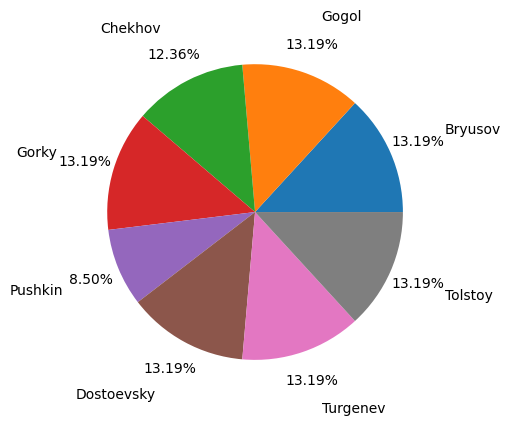

In [ ]:
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],  # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,            # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

Оставим 5 классов для обучения модели, например Брюсов, Гоголь, Толстой, Горький, Достоевский.

In [ ]:
del_authors = {'Pushkin', 'Turgenev', 'Chekhov'}
seq_train_balance = [seq for seq, author in zip(seq_train_balance, CLASS_LIST_BALANCE)
                    if author not in del_authors]
CLASS_LIST_BALANCE = [author for author in CLASS_LIST_BALANCE
                    if author not in del_authors]

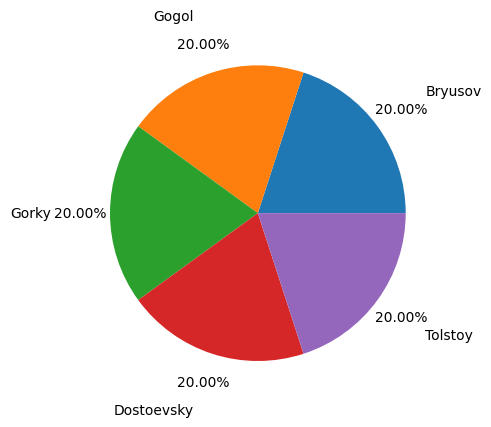

In [ ]:
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],  # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,            # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

## Нарезка текстов на сэмплы

In [ ]:
WIN_SIZE = 500
WIN_STEP = 25

def seq_split(sequence, win_size, step):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size +1, step)]

def seq_vectorize(
        seq_list,       #последовательность
        test_split,     #доля на тест
        val_split,      #доля на валидацию
        class_list,     #список классов
        win_size,       #ширина окна
        step            #шаг
):

    #списки для результатов функции
    x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []
    #пройдем по классам для добавления отрезков
    for class_item in class_list:
        cls = class_list.index(class_item)

        #граница раздела выборки на тест/валидацию/обучение
        gate_split_test = int(len(seq_list[cls]) * (test_split))
        gate_split_val = int(len(seq_list[cls]) * (test_split + val_split))

        #разбиваем на отрезки
        vectors_test = seq_split(seq_list[cls][:gate_split_test], win_size, step)                #последовательность для теста
        vectors_val = seq_split(seq_list[cls][gate_split_test:gate_split_val], win_size, step)   #последовательность для валидации
        vectors_train = seq_split(seq_list[cls][gate_split_val:], win_size, step)                #последовательность для тренировки

        #добавляем в выборку наши куски текста
        x_test += vectors_test
        x_val += vectors_val
        x_train += vectors_train

        #добавляем для каждого куска текста лейблы авторов текста
        #закодировав их в one-hot
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)
        y_val += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_val)
        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)

    #возвращаем выборки и лейблы в виде векторов
    return np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val), np.array(x_test), np.array(y_test)

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, 0.1, CLASS_LIST_BALANCE, WIN_SIZE, WIN_STEP)

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')
print(f'Форма входных данных для тестовой выборки: {x_val.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_val.shape}')
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для обучающей выборки: (41685, 500)
Форма выходных данных (меток) для обучающей выборки: (41685, 5)
Форма входных данных для тестовой выборки: (5125, 500)
Форма выходных данных (меток) для тестовой выборки: (5125, 5)
Форма входных данных для тестовой выборки: (5125, 500)
Форма выходных данных (меток) для тестовой выборки: (5125, 5)


## Функции построения графиков

In [ ]:
# Вывод графиков точности и ошибки
def show_plot(history, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели: '+title)
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

# Создание модели

In [ ]:
word_index = tokenizer.word_index
embeddings_index = navec

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

## Увеличенный слой LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, BatchNormalization
from keras.layers import LSTM, GRU, Bidirectional, Dropout, Dense

model_MIX = Sequential()
model_MIX.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE, weights=embedding_matrix, trainable=False))
model_MIX.add(SpatialDropout1D(0.3))
model_MIX.add(BatchNormalization())

# Два двунаправленных рекуррентных слоя LSTM
model_MIX.add(Bidirectional(LSTM(128, return_sequences=True)))
model_MIX.add(Bidirectional(LSTM(128, return_sequences=True)))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Два рекуррентных слоя GRU
model_MIX.add(GRU(16, return_sequences=True, reset_after=True))
model_MIX.add(GRU(16, reset_after=True))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Дополнительный полносвязный слой
model_MIX.add(Dense(100, activation='relu'))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())
model_MIX.add(Dense(len(CLASS_LIST_BALANCE), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1744882184.876075      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import Precision

reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=2, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)

callbacks=[reduce_lr, early_stopping]

In [ ]:
model_MIX.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mix = model_MIX.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/30


I0000 00:00:1744876401.980960     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 493ms/step - accuracy: 0.2490 - loss: 1.9178 - val_accuracy: 0.4548 - val_loss: 1.4707 - learning_rate: 0.0010
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 512ms/step - accuracy: 0.4154 - loss: 1.4696 - val_accuracy: 0.4603 - val_loss: 1.3599 - learning_rate: 0.0010
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 557ms/step - accuracy: 0.5241 - loss: 1.2161 - val_accuracy: 0.5500 - val_loss: 1.1139 - learning_rate: 0.0010
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 558ms/step - accuracy: 0.6451 - loss: 0.9757 - val_accuracy: 0.5651 - val_loss: 1.1615 - learning_rate: 0.0010
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 562ms/step - accuracy: 0.7827 - loss: 0.6419 - val_accuracy: 0.6071 - val_loss: 1.0857 - learning_rate: 0.0010
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 563ms/step - accuracy: 0.8315 - loss: 0.5081 - val_accuracy: 0.5849 - val_loss: 1.2629 - learning_rate: 0.0010
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 560ms/step - accuracy: 0.9329 - loss: 0.2388 - val_

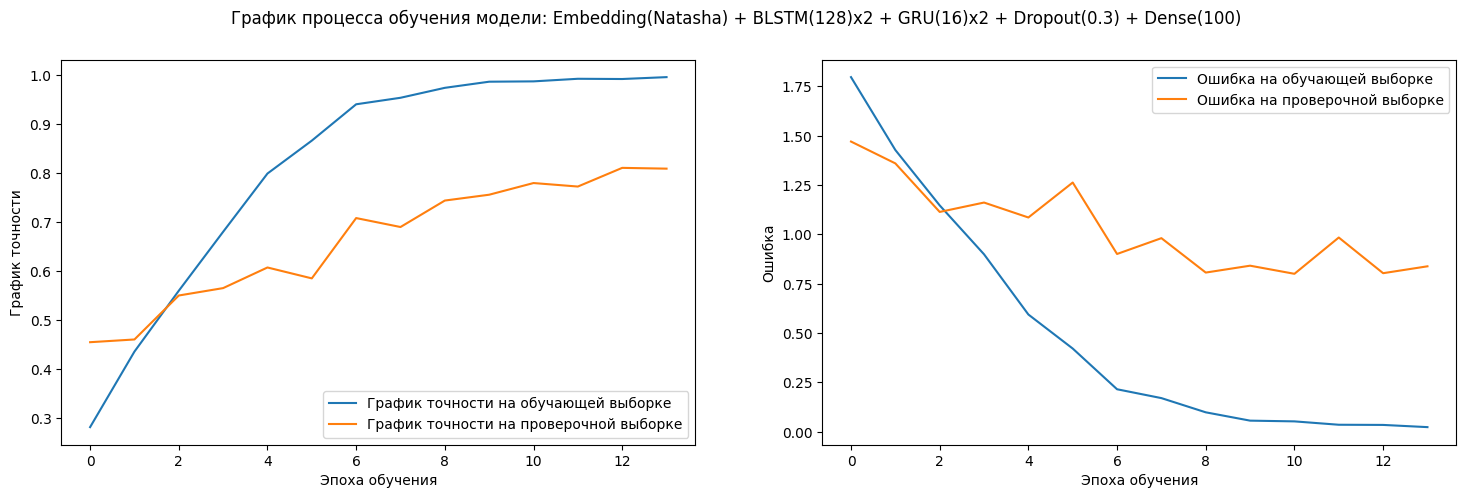

In [ ]:
show_plot(history_mix, 'Embedding(Natasha) + BLSTM(128)x2 + GRU(16)x2 + Dropout(0.3) + Dense(100)')

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step


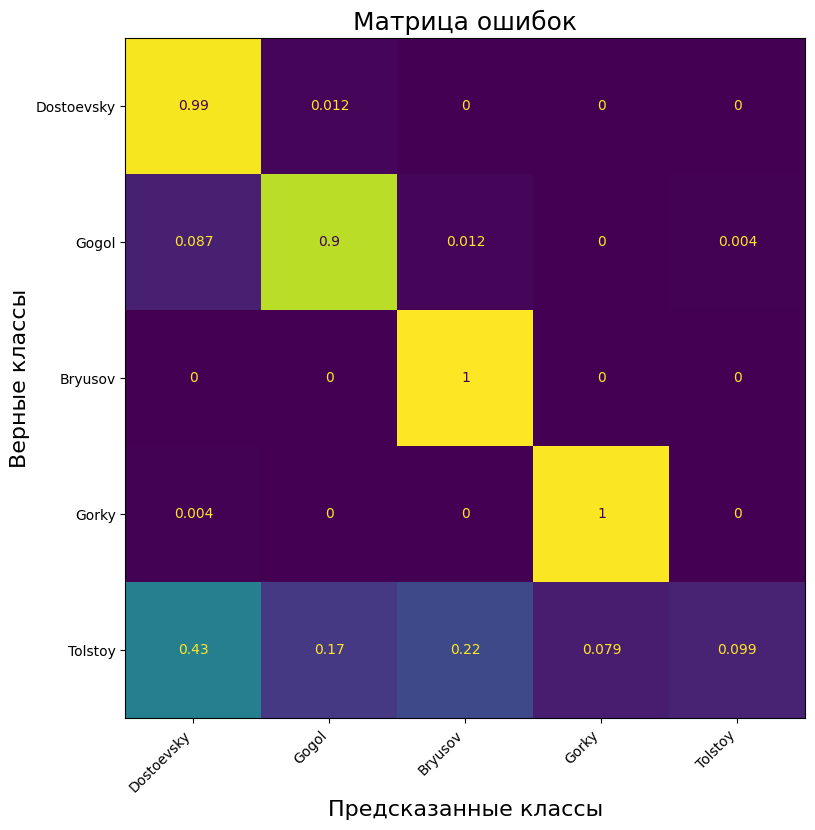


Средняя точность распознавания:  80%


In [ ]:
y_pred_mix = model_MIX.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix, CLASS_LIST_BALANCE)

Есть проблемы с Толстым, его стиль модель приписывает кому угодно, но не ему самому.

## Увеличенный слой GRU и в меньшей степени LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LayerNormalization
from keras.layers import LSTM, GRU, Bidirectional, Dropout, Dense, Attention

model_MIX_GRU = Sequential()
model_MIX_GRU.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE, weights=embedding_matrix, trainable=False))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(SpatialDropout1D(0.3))

# Два двунаправленных рекуррентных слоя LSTM
model_MIX_GRU.add(Bidirectional(LSTM(64, return_sequences=True)))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.2))

model_MIX_GRU.add(Bidirectional(LSTM(32, return_sequences=True)))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.1))

# Два рекуррентных слоя GRU
model_MIX_GRU.add(GRU(192, return_sequences=True, reset_after=True))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.3))

model_MIX_GRU.add(GRU(128, reset_after=True))
model_MIX_GRU.add(Dropout(0.3))
model_MIX_GRU.add(LayerNormalization())

# Дополнительный полносвязный слой
model_MIX_GRU.add(Dense(100, activation='relu'))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.3))

model_MIX_GRU.add(Dense(len(CLASS_LIST_BALANCE), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1745135378.511310      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision

reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=2, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
checkpoint_loss = ModelCheckpoint('best_loss.keras', monitor='val_loss', mode='min', save_best_only=True)
checkpoint_acc = ModelCheckpoint('best_acc.keras', monitor='val_accuracy', mode='max', save_best_only=True)

callbacks=[checkpoint_loss, checkpoint_acc, reduce_lr]

In [ ]:
model_MIX_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mix_GRU = model_MIX_GRU.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 85s 229ms/step - accuracy: 0.6392 - loss: 0.8827 - val_accuracy: 0.8386 - val_loss: 0.7677 - learning_rate: 0.0010
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 74s 226ms/step - accuracy: 0.9822 - loss: 0.0595 - val_accuracy: 0.8685 - val_loss: 0.6632 - learning_rate: 0.0010
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 225ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.8580 - val_loss: 0.9073 - learning_rate: 0.0010
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 224ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.8158 - val_loss: 1.1993 - learning_rate: 0.0010
Epoch 5/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 225ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.8180 - val_loss: 1.3046 - learning_rate: 2.0000e-04
Epoch 6/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 225ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.8277 - val_loss: 1.2886 - learning_rate: 2.0000e-04
Epoch 7/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 73s 225ms/step - accur

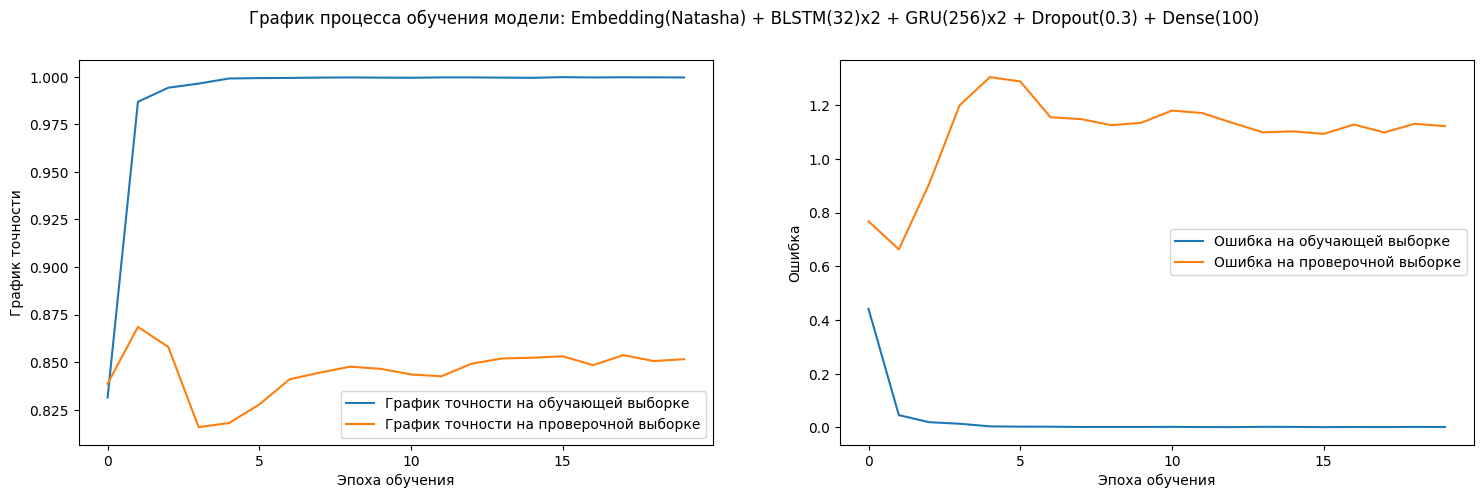

In [ ]:
show_plot(history_mix_GRU, 'Embedding(Natasha) + BLSTM(32)x2 + GRU(256)x2 + Dropout(0.3) + Dense(100)')

161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step


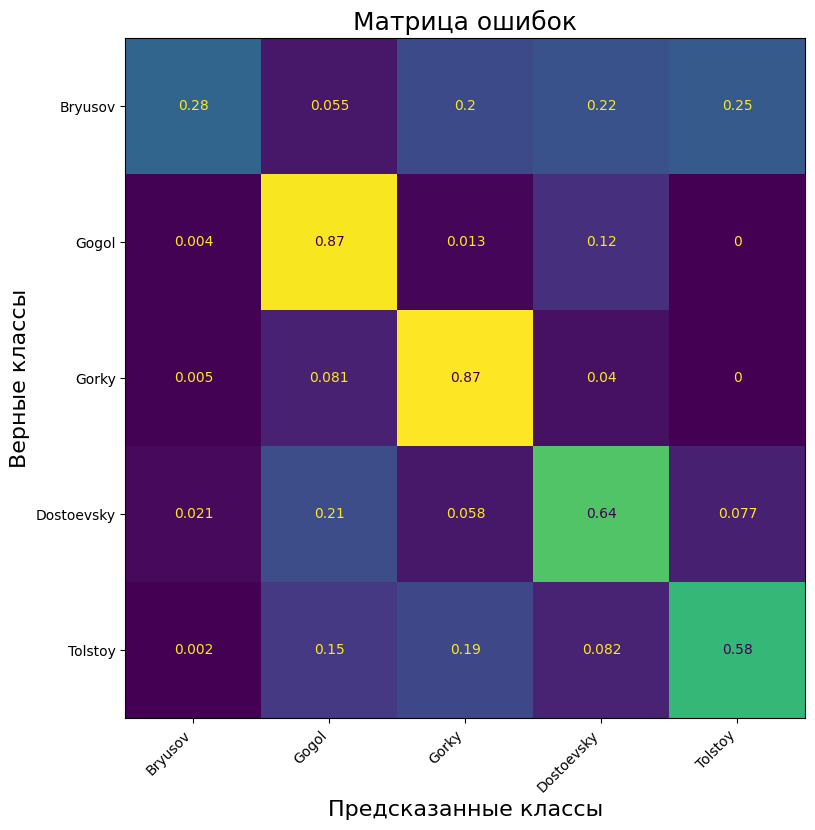


Средняя точность распознавания:  65%


In [ ]:
y_pred_mix_GRU = model_MIX_GRU.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU, CLASS_LIST_BALANCE)

In [ ]:
from keras.models import load_model

model_MIX_GRU_best_loss = load_model('best_loss.keras')
model_MIX_GRU_best_acc = load_model('best_acc.keras')

161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step


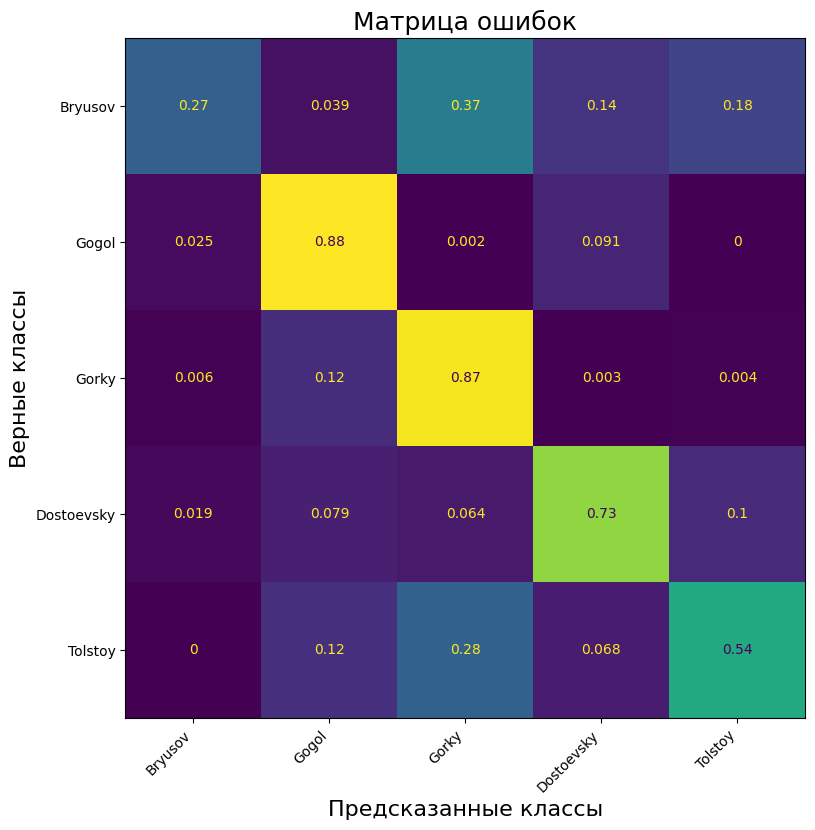


Средняя точность распознавания:  66%


In [ ]:
y_pred_mix_GRU_best_loss = model_MIX_GRU_best_loss.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU_best_loss, CLASS_LIST_BALANCE)

161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step


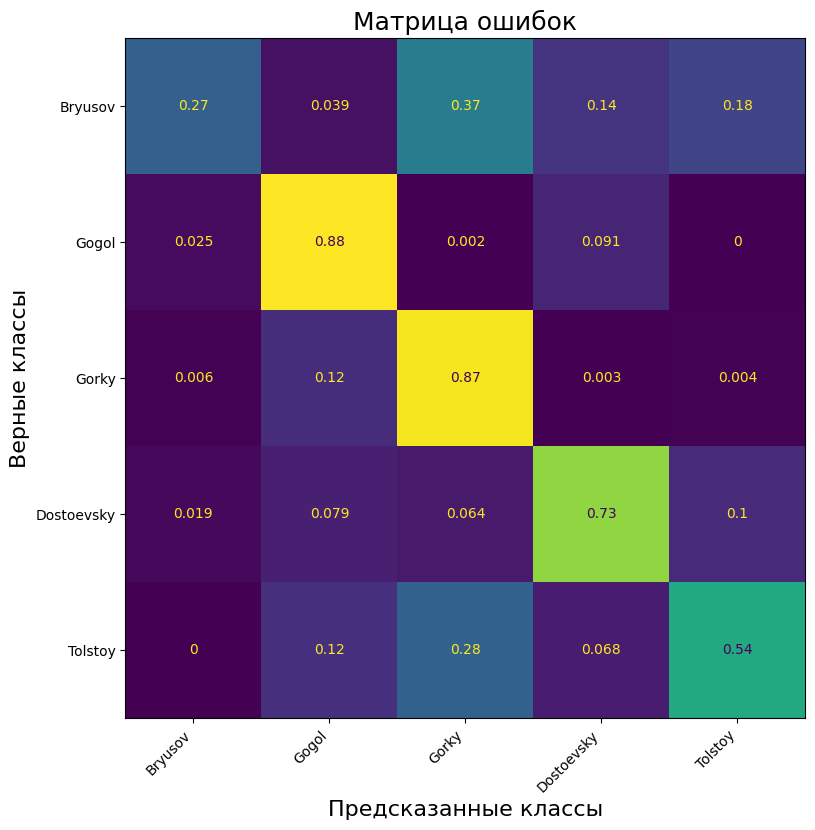


Средняя точность распознавания:  66%


In [ ]:
y_pred_mix_GRU_best_acc = model_MIX_GRU_best_acc.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU_best_acc, CLASS_LIST_BALANCE)

## Добавил Attention между слоями
Модель упорно путает Горького с Тургеневым. Попробую добавить механизм внимания после LSTM для улучшения результатов

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, GRU, Dense, Dropout, LayerNormalization, SpatialDropout1D, Embedding
from tensorflow.keras.layers import Attention, Concatenate

# Создаем входной слой
inputs = Input(shape=(WIN_SIZE,))

# Эмбеддинг и начальные слои
x = Embedding(max_words, embedding_dim, weights=[embedding_matrix], trainable=False)(inputs)
x = LayerNormalization()(x)
x = SpatialDropout1D(0.3)(x)

# Двунаправленные LSTM
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)

# Механизм внимания
attention = Attention()([x, x])  # Self-attention
gru_out = GRU(192, return_sequences=True)(x)

# Объединяем attention и GRU output
merged = Concatenate()([attention, gru_out])
x = GRU(128)(merged)
x = Dropout(0.3)(x)
x = LayerNormalization()(x)

# Финальные слои
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
x = LayerNormalization()(x)
outputs = Dense(len(CLASS_LIST_BALANCE), activation='softmax')(x)

# Собираем модель
model_MIX_GRU_att = Model(inputs=inputs, outputs=outputs)

In [ ]:
model_MIX_GRU_att.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mix_GRU_att = model_MIX_GRU_att.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.2288 - loss: 1.7946 - val_accuracy: 0.5727 - val_loss: 1.0841 - learning_rate: 0.0010
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.5969 - loss: 1.0461 - val_accuracy: 0.7958 - val_loss: 0.6343 - learning_rate: 0.0010
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8182 - loss: 0.5156 - val_accuracy: 0.8300 - val_loss: 0.6160 - learning_rate: 0.0010
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8742 - loss: 0.3616 - val_accuracy: 0.8435 - val_loss: 0.5973 - learning_rate: 0.0010
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9018 - loss: 0.2889 - val_accuracy: 0.8508 - val_loss: 0.5828 - learning_rate: 0.0010
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9232 - loss: 0.2258 - val_accuracy: 0.8854 - val_loss: 0.3937 - learning_rate: 0.0010
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9315 - l

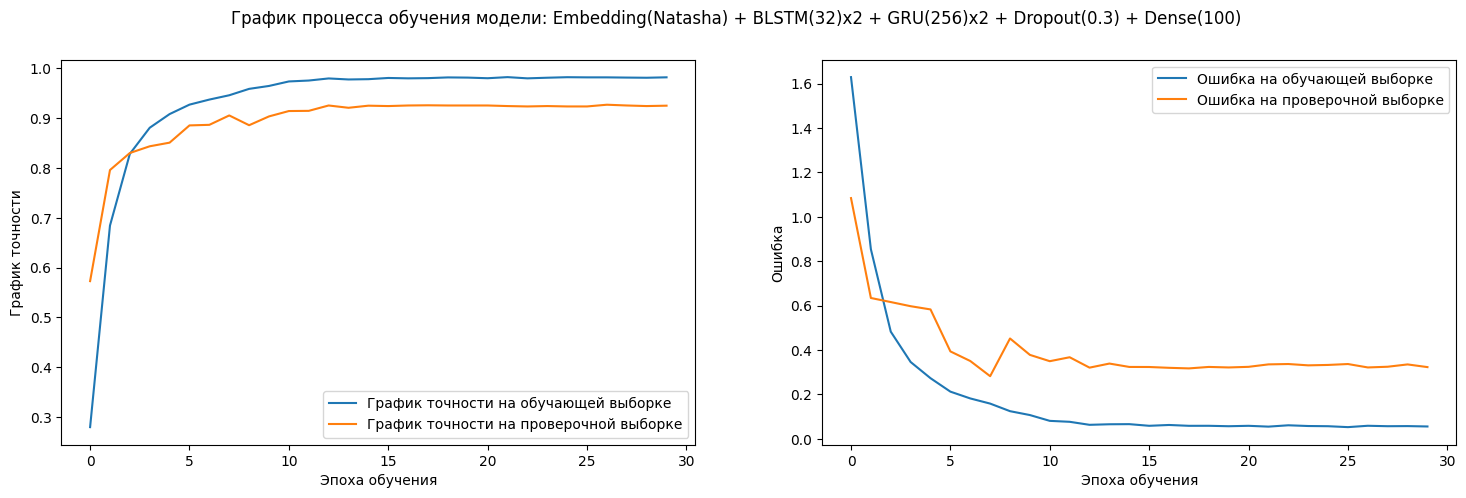

In [ ]:
show_plot(history_mix_GRU_att, 'Embedding(Natasha) + BLSTM(32)x2 + GRU(256)x2 + Dropout(0.3) + Dense(100)')

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step


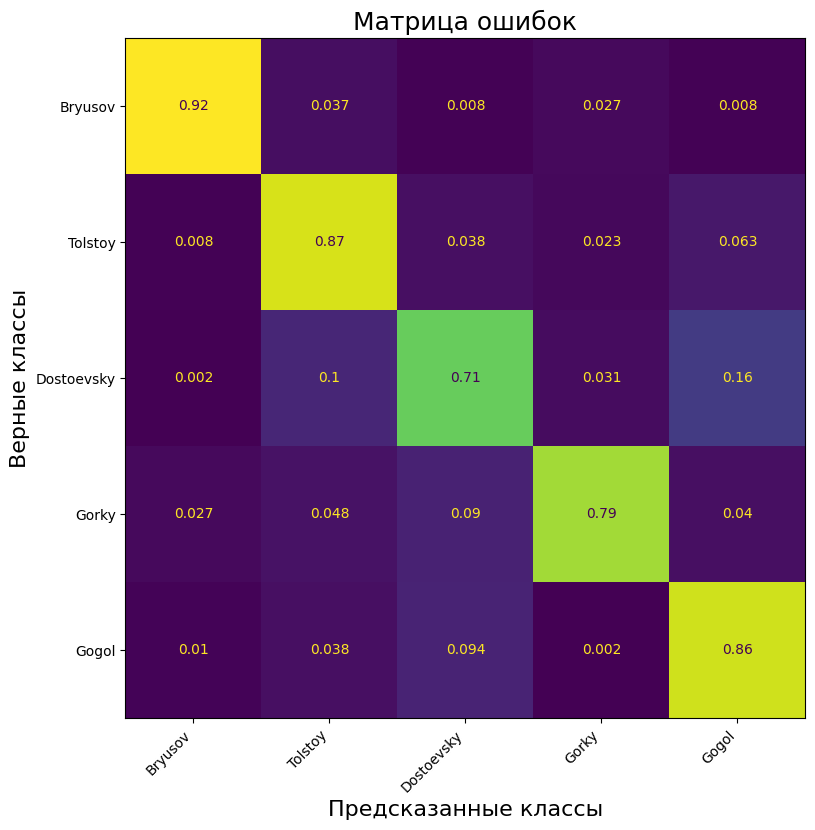


Средняя точность распознавания:  83%


In [ ]:
y_pred_mix_GRU_att = model_MIX_GRU_att.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU_att, CLASS_LIST_BALANCE)

Результат все же лучше, но не достаточно.

# Перенесу токенизатор из предыдущего урока

In [ ]:
import os   # Модуль для работы с файловой системой

import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

import matplotlib.pyplot as plt
%matplotlib inline

import keras
data_path = keras.utils.get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "{data_path}" -d ./dataset

!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

!pip install navec

2025-04-20 08:56:12.772110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745139372.965366      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745139373.021864      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


21547079/21547079 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long
--2025-04-20 08:56:27--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolvi

In [ ]:
from navec import Navec
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
FILE_DIR_POEMS = './dataset/poems'
file_list_poems = os.listdir(FILE_DIR_POEMS)

FILE_DIR_PROSE = './dataset/prose'
file_list_prose = os.listdir(FILE_DIR_PROSE)

CLASS_LIST = list(set(file_list_poems + file_list_prose))
print("Общий список писателей:")
print(CLASS_LIST)

Общий список писателей:
['Dostoevsky', 'Turgenev', 'Herzen', 'Pushkin', 'Gorky', 'Chekhov', 'Nekrasov', 'Blok', 'Tolstoy', 'Bryusov', 'Gogol', 'Lermontov']


In [ ]:
all_texts = {}

for author in CLASS_LIST:
    all_texts[author] = ''
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) + glob.glob('./dataset/poems/{}/*.txt'.format(author)):
        with open (f'{path}', 'r', errors='ignore') as f:
            text = f.read()

        all_texts[author] += ' ' + text.replace('\n', ' ')

total = sum(len(i) for i in all_texts.values())
print(f'Количество символов в датасете {total}')

print('Общая выборка по писателям:')
for author in CLASS_LIST:
    print(f'{author} - {len(all_texts[author])} символов, доля в сете: {len(all_texts[author])/total*100 :.2f}%')

Количество символов в датасете 38146925
Общая выборка по писателям:
Dostoevsky - 11221679 символов, доля в сете: 29.42%
Turgenev - 2345243 символов, доля в сете: 6.15%
Herzen - 1282316 символов, доля в сете: 3.36%
Pushkin - 1399557 символов, доля в сете: 3.67%
Gorky - 4324025 символов, доля в сете: 11.34%
Chekhov - 1834330 символов, доля в сете: 4.81%
Nekrasov - 351258 символов, доля в сете: 0.92%
Blok - 604204 символов, доля в сете: 1.58%
Tolstoy - 9392435 символов, доля в сете: 24.62%
Bryusov - 2830897 символов, доля в сете: 7.42%
Gogol - 2196599 символов, доля в сете: 5.76%
Lermontov - 364382 символов, доля в сете: 0.96%


In [ ]:
!pip install razdel

In [ ]:
from razdel import tokenize

def filtered_tokens(text):
    return [token.text for token in tokenize(text)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

embedding_dim = 300    # размерность векторов эмбединга (300d в имени эмбединга)
max_words = 15000      # Количество слов, рассматриваемых как признаки

tokenizer = Tokenizer(
    num_words=max_words,
    filters='',       # Отключаем встроенную фильтрацию (так как razdel уже всё обработал)
    lower=True,      # Регистр тоже можно контролировать в razdel
    oov_token="<OOV>" # Токен для неизвестных слов
)

tokenized_text=[filtered_tokens(text) for text in all_texts.values()]

tokenizer.fit_on_texts(tokenized_text)

seq_train = tokenizer.texts_to_sequences(tokenized_text)

In [ ]:
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train[cls])} слов, доля в общей базе: {len(seq_train[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))


median = int(np.median(mean_list)) # Зафиксировали медианное значение
CLASS_LIST_BALANCE = [] # Сбалансированный набор меток
seq_train_balance = []
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    if len(seq_train[cls]) > median * 0.6:
      seq_train_balance.append(seq_train[cls][:median])
      CLASS_LIST_BALANCE.append(author)

Датасет состоит из 7595948 слов
Общая выборка по писателям (по словам):
Dostoevsky - 2256313 слов, доля в общей базе: 29.70%
Turgenev - 474895 слов, доля в общей базе: 6.25%
Herzen - 241466 слов, доля в общей базе: 3.18%
Pushkin - 271931 слов, доля в общей базе: 3.58%
Gorky - 888673 слов, доля в общей базе: 11.70%
Chekhov - 376425 слов, доля в общей базе: 4.96%
Nekrasov - 71975 слов, доля в общей базе: 0.95%
Blok - 117790 слов, доля в общей базе: 1.55%
Tolstoy - 1860486 слов, доля в общей базе: 24.49%
Bryusov - 531982 слов, доля в общей базе: 7.00%
Gogol - 433096 слов, доля в общей базе: 5.70%
Lermontov - 70916 слов, доля в общей базе: 0.93%
Среднее значение слов:  632996.0
Медианное значение слов:  404760.5


In [ ]:
total = sum(len(i) for i in seq_train_balance)

print('Сбалансированная выборка по писателям (по словам):')
mean_list_balance = np.array([])
for author in CLASS_LIST_BALANCE:
    cls = CLASS_LIST_BALANCE.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list_balance = np.append(mean_list_balance, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list_balance.mean()))
print('Медианное значение слов: ', np.median(mean_list_balance))

Сбалансированная выборка по писателям (по словам):
Dostoevsky - 404760 слов, доля в общей базе: 13.15%
Turgenev - 404760 слов, доля в общей базе: 13.15%
Pushkin - 271931 слов, доля в общей базе: 8.84%
Gorky - 404760 слов, доля в общей базе: 13.15%
Chekhov - 376425 слов, доля в общей базе: 12.23%
Tolstoy - 404760 слов, доля в общей базе: 13.15%
Bryusov - 404760 слов, доля в общей базе: 13.15%
Gogol - 404760 слов, доля в общей базе: 13.15%
Среднее значение слов:  384614.0
Медианное значение слов:  404760.0


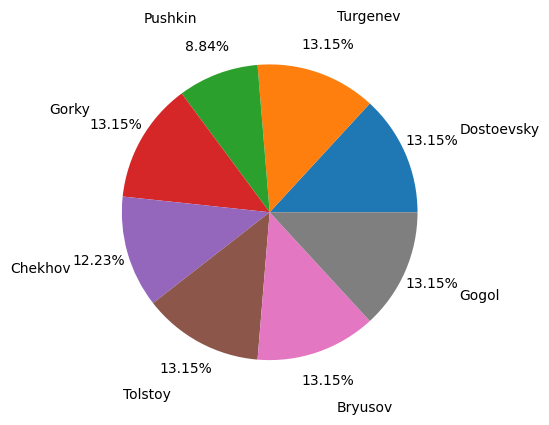

In [ ]:
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],  # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,            # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

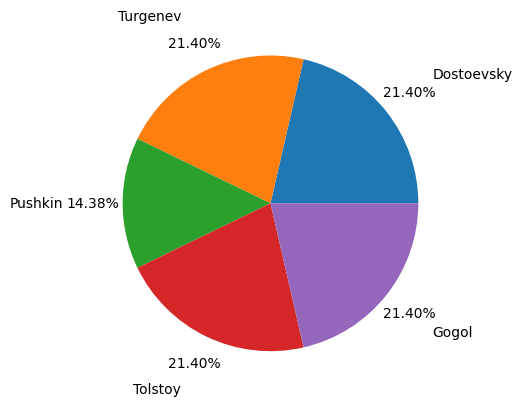

In [ ]:
del_authors = {'Gorky', 'Bryusov', 'Chekhov'}
seq_train_balance = [seq for seq, author in zip(seq_train_balance, CLASS_LIST_BALANCE)
                    if author not in del_authors]
CLASS_LIST_BALANCE = [author for author in CLASS_LIST_BALANCE
                    if author not in del_authors]

fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance],  # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST_BALANCE,            # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
WIN_SIZE = 1000
WIN_STEP = 100

def seq_split(sequence, win_size, step):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size +1, step)]

def seq_vectorize(
        seq_list,       #последовательность
        test_split,     #доля на тест
        val_split,      #доля на валидацию
        class_list,     #список классов
        win_size,       #ширина окна
        step            #шаг
):

    #списки для результатов функции
    x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []
    #пройдем по классам для добавления отрезков
    for class_item in class_list:
        cls = class_list.index(class_item)

        #граница раздела выборки на тест/валидацию/обучение
        gate_split_test = int(len(seq_list[cls]) * (test_split))
        gate_split_val = int(len(seq_list[cls]) * (test_split + val_split))

        #разбиваем на отрезки
        vectors_test = seq_split(seq_list[cls][:gate_split_test], win_size, step)                #последовательность для теста
        vectors_val = seq_split(seq_list[cls][gate_split_test:gate_split_val], win_size, step)   #последовательность для валидации
        vectors_train = seq_split(seq_list[cls][gate_split_val:], win_size, step)                #последовательность для тренировки

        #добавляем в выборку наши куски текста
        x_test += vectors_test
        x_val += vectors_val
        x_train += vectors_train

        #добавляем для каждого куска текста лейблы авторов текста
        #закодировав их в one-hot
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)
        y_val += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_val)
        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)

    #возвращаем выборки и лейблы в виде векторов
    return np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val), np.array(x_test), np.array(y_test)

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, 0.1, CLASS_LIST_BALANCE, WIN_SIZE, WIN_STEP)

In [ ]:
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')
print(f'Форма входных данных для тестовой выборки: {x_val.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_val.shape}')
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для обучающей выборки: (24542, 1000)
Форма выходных данных (меток) для обучающей выборки: (24542, 8)
Форма входных данных для тестовой выборки: (2999, 1000)
Форма выходных данных (меток) для тестовой выборки: (2999, 8)
Форма входных данных для тестовой выборки: (2999, 1000)
Форма выходных данных (меток) для тестовой выборки: (2999, 8)


In [ ]:
# Вывод графиков точности и ошибки
def show_plot(history, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели: '+title)
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
word_index = tokenizer.word_index
embeddings_index = navec

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LayerNormalization
from keras.layers import LSTM, GRU, Bidirectional, Dropout, Dense, Attention

model_MIX_GRU = Sequential()
model_MIX_GRU.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE, weights=embedding_matrix, trainable=False))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(SpatialDropout1D(0.3))

# Два двунаправленных рекуррентных слоя LSTM
model_MIX_GRU.add(Bidirectional(LSTM(64, return_sequences=True)))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.2))

model_MIX_GRU.add(Bidirectional(LSTM(64, return_sequences=True)))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.2))

# Два рекуррентных слоя GRU
model_MIX_GRU.add(GRU(128, return_sequences=True, reset_after=True))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.2))

model_MIX_GRU.add(GRU(128, reset_after=True))
model_MIX_GRU.add(Dropout(0.2))
model_MIX_GRU.add(LayerNormalization())

# Дополнительный полносвязный слой
model_MIX_GRU.add(Dense(100, activation='relu'))
model_MIX_GRU.add(LayerNormalization())
model_MIX_GRU.add(Dropout(0.3))

model_MIX_GRU.add(Dense(len(CLASS_LIST_BALANCE), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision

reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=2, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
checkpoint_loss = ModelCheckpoint('best_loss.keras', monitor='val_loss', mode='min', save_best_only=True)
checkpoint_acc = ModelCheckpoint('best_acc.keras', monitor='val_accuracy', mode='max', save_best_only=True)

callbacks=[checkpoint_loss, checkpoint_acc]

In [ ]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=5e-4,
    decay_steps=10_000,
    decay_rate=0.9
)

optimizer = AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-5  # L2-регуляризация
)

In [ ]:
model_MIX_GRU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_mix_GRU = model_MIX_GRU.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 64s 426ms/step - accuracy: 0.2263 - loss: 1.9306 - val_accuracy: 0.2633 - val_loss: 1.5594
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.2814 - loss: 1.5516 - val_accuracy: 0.3333 - val_loss: 1.5798
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.4643 - loss: 1.2969 - val_accuracy: 0.6265 - val_loss: 0.9607
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 417ms/step - accuracy: 0.6534 - loss: 0.9180 - val_accuracy: 0.8909 - val_loss: 0.3900
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.8435 - loss: 0.4561 - val_accuracy: 0.8149 - val_loss: 0.4789
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.9175 - loss: 0.2407 - val_accuracy: 0.8860 - val_loss: 0.3162
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 417ms/step - accuracy: 0.9540 - loss: 0.1455 - val_accuracy: 0.9126 - val_loss: 0.2689
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.9727 -

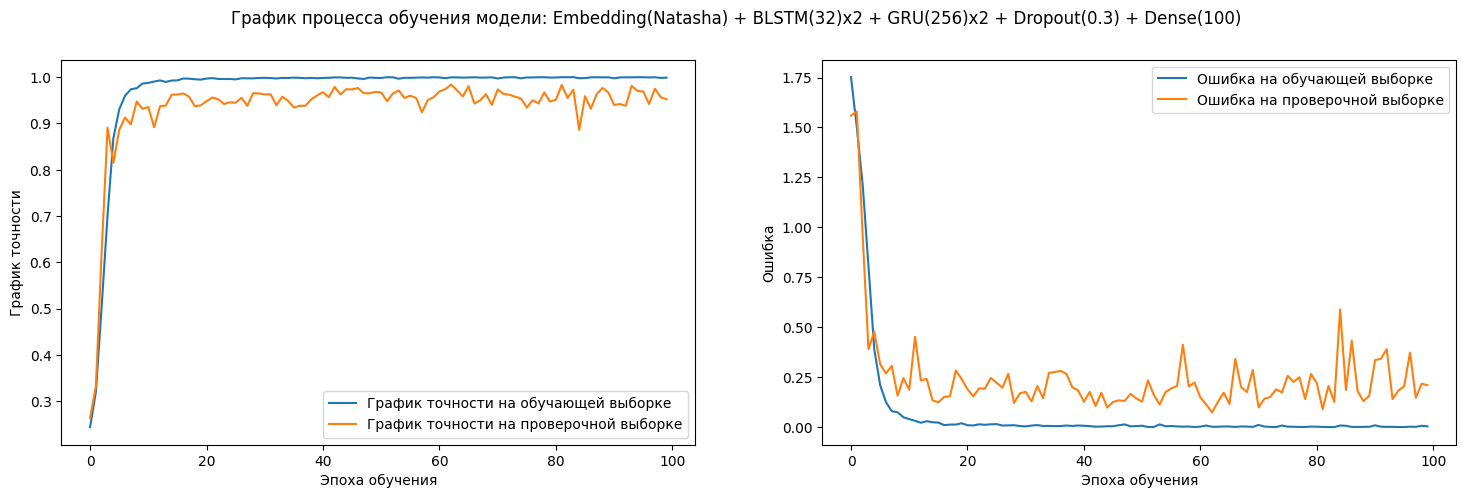

In [ ]:
show_plot(history_mix_GRU, 'Embedding(Natasha) + BLSTM(32)x2 + GRU(256)x2 + Dropout(0.3) + Dense(100)')

58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step


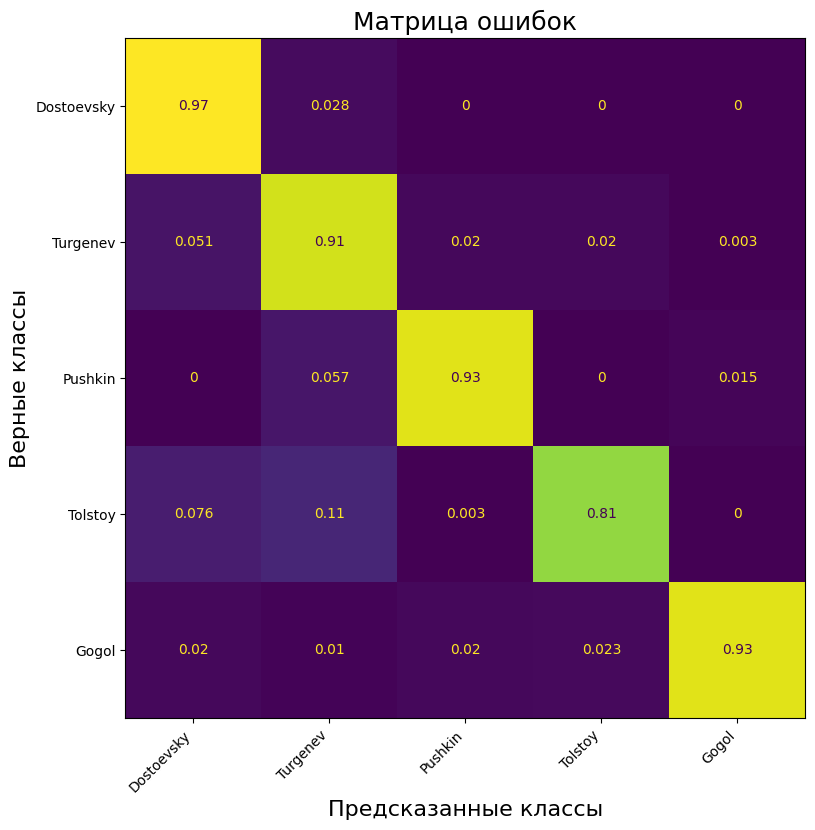


Средняя точность распознавания:  91%


In [ ]:
y_pred_mix_GRU = model_MIX_GRU.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU, CLASS_LIST_BALANCE)

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step


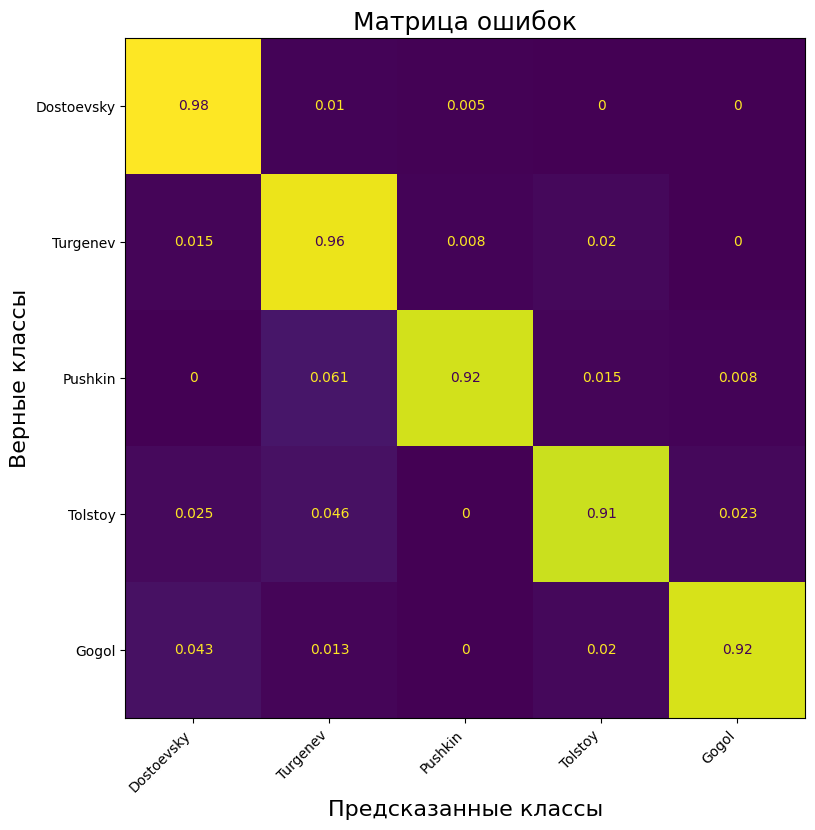


Средняя точность распознавания:  94%


In [ ]:
from keras.models import load_model

model_MIX_GRU_best_loss = load_model('best_loss.keras')
y_pred_mix_GRU_best_loss = model_MIX_GRU_best_loss.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU_best_loss, CLASS_LIST_BALANCE)

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step


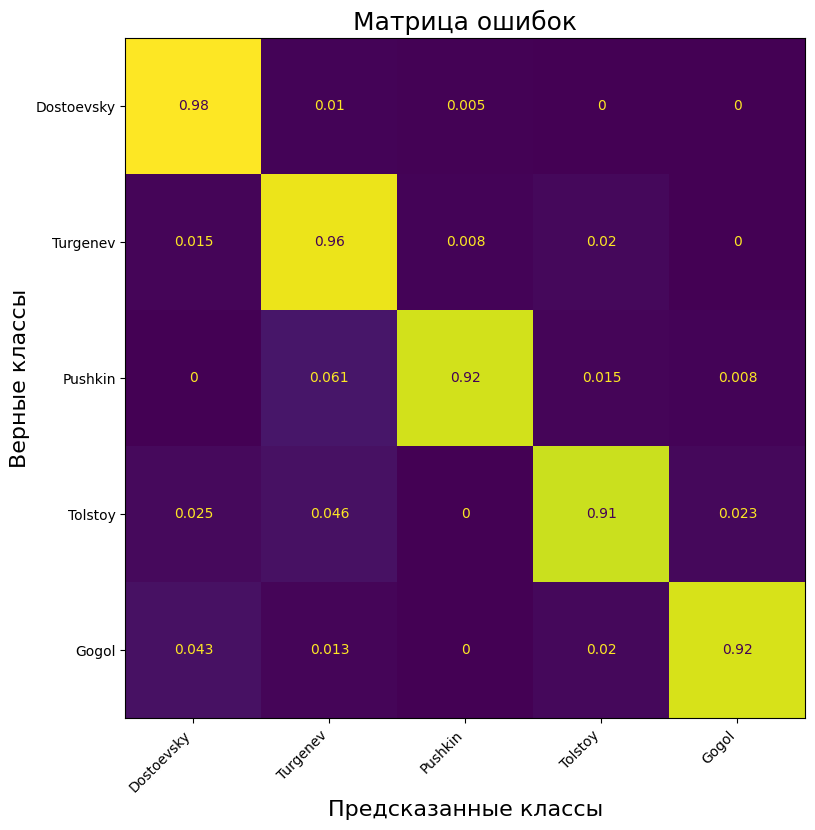


Средняя точность распознавания:  94%


In [ ]:
from keras.models import load_model

model_MIX_GRU_best_acc = load_model('best_acc.keras')
y_pred_mix_GRU_best_acc = model_MIX_GRU_best_acc.predict(x_test)
show_confusion_matrix(y_test, y_pred_mix_GRU_best_acc, CLASS_LIST_BALANCE)

Результаты изменений:
начал с изменения соотношения нейронов слоев LSTM/GRU - вывод: LSTM отвечает за запоминание разнесенных на большое расстояние образов/понятий, GRU больше запоминает локальные паттерны.
Поробовал переставить порядок Dropout и LayerNormalization - модель стала показывать более стабильные графики обучения на порядке дропаут->нормализация.

Попробовал изменять размеры окна и шага - меньшие окна дают больше примеров для обучения, а так же больше подходят для выявления локальных паттернов, при больших окнах примеров становится гораздо меньше, но появляется возможность следить за большими кусками текстов, абзацами, что хорошо для авторов с глобальными концепциями в текстах.

С большими окнами и малым шагом модель быстро уходит в  переобучение а на валидации остается в пределе 85%

Для проверки нужно будет перенести токенизатор Razdel из предыдущего урока

Слегка уменьшил нейроны на обоих слоях, а так же сменил оптимизатор на AdamW - результаты на валидации значительно улучшились

окно 1000 знаков, шаг 100

32-32-128-128 100 эпох 83%

64-64-128-128 100 эпох 94%

После долгих экспериментов на 20-30 эпохах решил попробовать поставить 100 эпох обучения и посмотреть результат. Получилось следующее - модель как и ожидалось вышла на 100% точности на тренировке, но при этом колебалась на уровне 95% на валидации. Но плюс данной схемы - можно выбрать из сотни заходов обучения лучшие по ошибке и точности на валидации. Так как это мультиклассовая модель, то незначительное улучшение этих показателей может значительно отразиться на определенном классе. В итоге, получилось достигнуть 94% точности на тестовых данных при 64 нейронах на слоях LSTM, 128 - на GRU, и с использованием оптимизатора AdamW с настройкой расписания шага обучения. Так же использовался токенизатор Razdel без очистки от знаков препинания, т.к. они тоже являются индикатором стиля автора - длинна предложений, сложность конструкций, частота диалогов.

Нужно было сразу выписывать в результат настройку НС и ее показатели, сделал тоько для 2 последних вариантов, на будущее нужно учесть.

## Проверка на стороннем тексте

Взял текст не собственный, но человека, с которым знаком. Занимается ролевками, по-этому текст вполне подойдет под художественное сравнение с классиками.

In [ ]:
!wget https://storage.yandexcloud.net/quiz.pic/text_to_compare.txt

--2025-04-20 16:52:47--  https://storage.yandexcloud.net/quiz.pic/text_to_compare.txt
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15262 (15K) [text/plain]
Saving to: ‘text_to_compare.txt’

text_to_compare.txt 100%[===================>]  14.90K  --.-KB/s    in 0s      

2025-04-20 16:52:47 (375 MB/s) - ‘text_to_compare.txt’ saved [15262/15262]



In [ ]:
with open (f'./text_to_compare.txt', 'r', errors='ignore') as f:
    text_to_compare = f.read()

In [ ]:
text_to_compare = text_to_compare.replace('\n', ' ')
text_to_compare

'Vesper Twilane [Веспер Твилейн]  дата рождения 30 апреля 2000  деятельность: Криминальный аналитик, Специалист по поведенческому анализу. семейное положение: Холостячка  контакт с обскурумом: патология: Бешенный метаболизм. Ест и не толстеет, но есть нюанс. Если не ест хотя бы два часа  может уснуть. Сразу после еды очень бодра, активна и продуктивна, дальше эффект идет на спад.      Этот мир не сломил её, хотя не раз пытался. Веспер родилась 30 апреля, в ночь, когда мир пылал кострами Бельтайна.  Её собственная жизнь разгоралась скромно, но упрямо, как крохотный огонёк, противящийся ветру. Она выросла в Таллахасси, в доме, который больше напоминал поле боя. Родители все же развелись, когда ей было шесть, и началась затяжная война, где Веспер стала не просто пешкой, а трофеем. Отец несколько раз пытался забрать её силой назло матери, а потом исчез, словно испарился. Думать забыл о том как она ему нужна. Мать не сразу оправилась после всего этого кошмара. Пыталась заглушить боль сначал

## Токенизируем текст

In [ ]:
tokenized_test=[filtered_tokens(text_to_compare)]

seq_test = tokenizer.texts_to_sequences(tokenized_test)

total_test = sum(len(i) for i in seq_test)
print(f'Текст состоит из {total_test} знаков')

Текст состоит из 1552 знаков


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_tokenized_text(tokenized_seq, win_size=1000, step=100):

    tokens = tokenized_seq[0]  # Извлекаем список токенов
    sequences = []

    # Нарезка на скользящие окна
    for i in range(0, len(tokens) - win_size + 1, step):
        window = tokens[i:i + win_size]
        sequences.append(window)

    # Паддинг (на случай, если len(tokens) < win_size)
    padded = pad_sequences(sequences, maxlen=win_size, padding='post', truncating='post')
    return np.array(padded)

X_new = prepare_tokenized_text(seq_test)  # Готовый вход для модели

## Предскажем вероятности авторов

In [ ]:
# Предсказание вероятностей для каждого окна
probs = model_MIX_GRU_best_loss.predict(X_new)

# Усреднение вероятностей по всем окнам
mean_probs = np.mean(probs, axis=0) * 100

# Сопоставление с авторами
results = {author: prob for author, prob in zip(CLASS_LIST_BALANCE, mean_probs)}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


## Выведем на круговую диаграмму

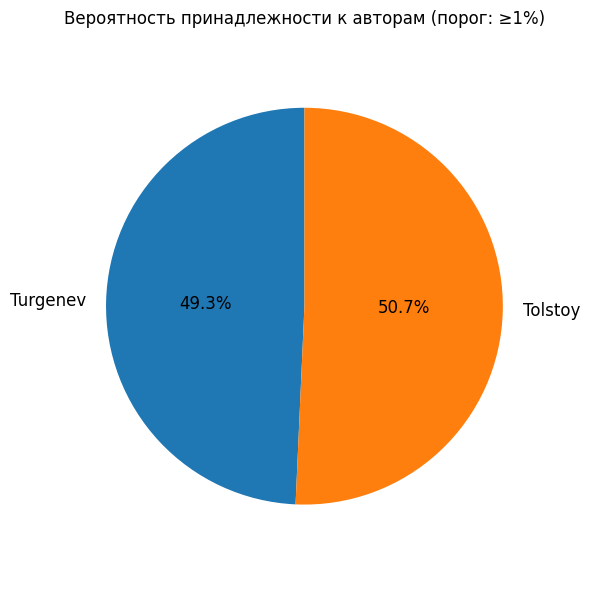

In [ ]:
def plot_probs(results):
    # Фильтрация результатов: оставляем только авторов с вероятностью >= 1%
    filtered_results = {author: prob for author, prob in results.items() if prob >= 1.0}

    # Подготовка данных для визуализации
    labels = list(filtered_results.keys())
    sizes = list(filtered_results.values())

    # Создание диаграммы
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',  # Форматирование для >=1%
        startangle=90,
        pctdistance=0.5,
        textprops={'fontsize': 12}
    )

    ax.axis('equal')
    plt.title('Вероятность принадлежности к авторам (порог: ≥1%)')
    plt.tight_layout()
    plt.show()

plot_probs(results)

# Итог

Наша модель распознала тестовые тексты 5 русских классиков с точностью 94%, что радует, т.к. довольно долго модель держалась на уровне 85%. Так же

Отмечу для себя, что AdamW показал себя надежнее для такого типа сети (RNN), чем обычный Adam.

При колебаниях результатов вокруг определенного показателя точности можно рассмотреть вариант длительного обучения с сохранением лучшей точности/ошибки и последующей загрузкой.

Разные типы слоев (LSTM/GRU) обладают разными преимуществами, первый способен эффективнее улавливать разнесенные в пространстве данных черты, второй лучше справляется с локальными паттернами.

Задачи, поставленные в Домашней работе выполнены в требуемом объеме.

